# Aug ??, 2022 ()

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
nn = 512
mice = Mice(nn, full_load=True, load_parcel=True, load_allen=True)

In [4]:
np.save(pjoin(tmp_dir, 'node_lookup.npy'), mice.node_lookup)

In [3]:
from register.register import Register

reg = Register(mice)

In [4]:
%%time

obj_all = reg.register_anat(save_results=True, anchor_ses=2)

100%|██████████| 10/10 [03:49<00:00, 22.91s/it]


CPU times: user 1h 52min, sys: 46.1 s, total: 1h 52min 46s
Wall time: 4min 24s


(25.0, 0.0)

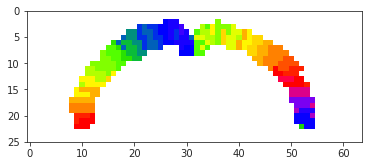

In [6]:
fig, ax = create_figure()
x = obj_all['sub-SLC02_ses-1']['cols'].numpy()
ax.imshow(mwh(x[..., 40].T == 0, x[..., 40].T), cmap='prism')
ax.set_ylim(25, 0)

In [4]:
%%time

# mice.parcel.fit_parcel()

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

Warning! missing regions:
'[1431, 2931, 2951, 2967]'

num regions,    left: 1533,  right: 1533
region id diff,         r - l:  Counter({1536: 1533})

[PROGRESS] fit columnar: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] save results: done.

CPU times: user 4h 21min 41s, sys: 41min 15s, total: 5h 2min 57s
Wall time: 28min 18s


In [4]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 4bfe3d07b4858144c219b9346329027024102ab6
python           : 3.8.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.13.0-39-generic
Version          : #44~20.04.1-Ubuntu SMP Thu Mar 24 16:43:35 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.4.2
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 61.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : 2.9.1
jinja2           : 2.11.3
IPython          : 8.3.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.4
bro

In [8]:
list(mice.node_lookup)

['ca2', 'bold']

In [5]:
node_lookup = np.load(pjoin(tmp_dir, 'node_lookup.npy'), allow_pickle=True).item()

In [14]:
i = 24
print(node_lookup['ca2'][i])

1-100-0

In [15]:
j = 259
print(node_lookup['bold'][j])

1-100-0